In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [2]:
import joblib
from mtranslate import translate

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('C:/Users/user/Desktop/Final_Augmented_dataset_Diseases_and_Symptoms.csv')

In [127]:
df = shuffle(df,random_state=42)
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
94355,chronic glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76112,torticollis,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
222455,personality disorder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
98158,fracture of the patella,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57032,chronic otitis media,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x: 1 if x == col else x)

# Sonuçları görüntüleyin
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
94355,chronic glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76112,torticollis,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
222455,personality disorder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
98158,fracture of the patella,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57032,chronic otitis media,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
print(df.isnull().sum())

diseases                            0
anxiety and nervousness             0
depression                          0
shortness of breath                 0
depressive or psychotic symptoms    0
                                   ..
hip weakness                        0
back swelling                       0
ankle stiffness or tightness        0
ankle weakness                      0
neck weakness                       0
Length: 378, dtype: int64


In [140]:
print(df.dtypes)

diseases                            object
anxiety and nervousness              int64
depression                           int64
shortness of breath                  int64
depressive or psychotic symptoms     int64
                                     ...  
hip weakness                         int64
back swelling                        int64
ankle stiffness or tightness         int64
ankle weakness                       int64
neck weakness                        int64
Length: 378, dtype: object


In [131]:
df['diseases'].unique()

array(['chronic glaucoma', 'torticollis', 'personality disorder',
       'fracture of the patella', 'chronic otitis media', 'arrhythmia',
       'peripheral nerve disorder', 'neuralgia', 'hyperkalemia',
       'ankylosing spondylitis', 'macular degeneration', 'pilonidal cyst',
       'hypoglycemia', 'anxiety', 'noninfectious gastroenteritis',
       'gastritis', 'drug abuse (methamphetamine)', 'psoriasis',
       'trichomonas infection', 'fracture of the shoulder',
       'knee ligament or meniscus tear', 'eczema', 'trigeminal neuralgia',
       'postoperative infection', 'dry eye of unknown cause',
       'mononucleosis', 'strep throat', 'peritonitis',
       'complex regional pain syndrome', 'injury to the leg',
       'oppositional disorder', 'juvenile rheumatoid arthritis',
       'skin cancer', 'panic disorder', 'dislocation of the vertebra',
       'acute sinusitis', 'hidradenitis suppurativa',
       'injury to the trunk', 'idiopathic irregular menstrual cycle',
       'benign p

In [132]:
len(df.columns)

378

In [133]:
df.describe()

,pus in sputum,underweight,arm cramps or spasms,abnormal appearing tongue,pallor,shoulder cramps or spasms,joint stiffness or tightness,eye strain,pus in urine,abnormal size or shape of ear,...,low back stiffness or tightness,skin on head or neck looks infected,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,hip weakness,back swelling,ankle stiffness or tightness,neck weakness
count,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0,...,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0,246945.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name = 'count')
print(null_checker)

                                  count
diseases                              0
anxiety and nervousness               0
depression                            0
shortness of breath                   0
depressive or psychotic symptoms      0
...                                 ...
hip weakness                          0
back swelling                         0
ankle stiffness or tightness          0
ankle weakness                        0
neck weakness                         0

[378 rows x 1 columns]


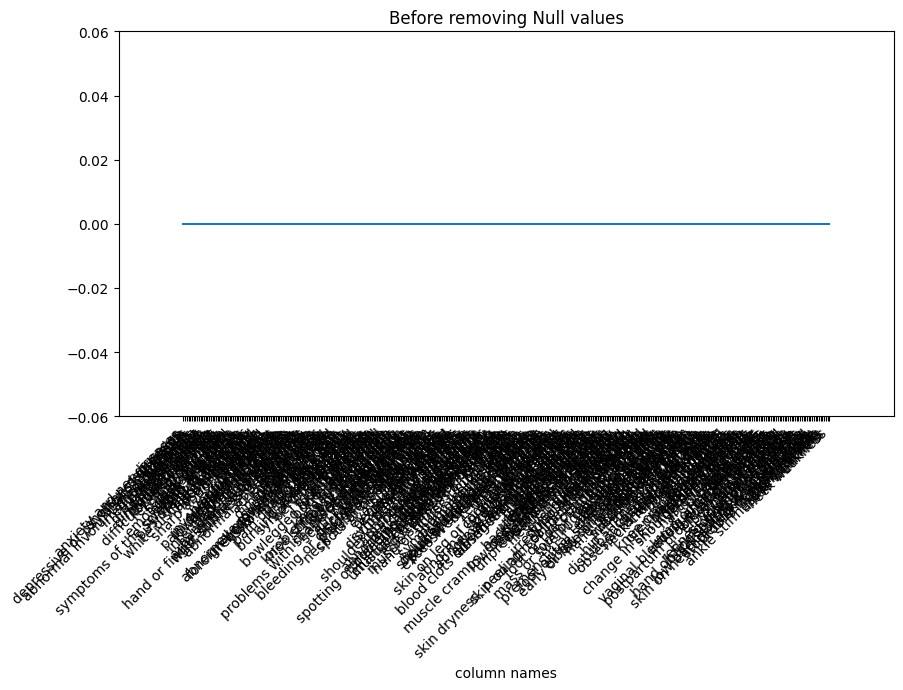

In [17]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [134]:
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
94355,chronic glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76112,torticollis,0,0,0,0,0,0,0,abnormal involuntary movements,0,...,0,0,0,0,0,0,0,0,0,0
222455,personality disorder,0,0,0,0,0,0,insomnia,0,0,...,0,0,0,0,0,0,0,0,0,0
98158,fracture of the patella,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57032,chronic otitis media,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
len(df['diseases'].unique())

773

In [30]:
len(df.columns)

378

In [20]:
df.columns[0]

'diseases'

In [141]:
X = df.iloc[: , 1:].values
y = df['diseases'].values

In [142]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [143]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(197556, 377) (49389, 377) (197556,) (49389,)


In [147]:
rfc=RandomForestClassifier(random_state=42)
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(X_train,y_train)
preds=rnd_forest.predict(X_test)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)


F1-score% = 34.73988551282132 | Accuracy% = 58.53327664054749


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, X_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

In [59]:
layers = tf.keras.layers

In [58]:
from tensorflow.keras import layers , models

In [60]:
input_dim = 377
n_classes = 1

In [61]:
model = models.Sequential([

    layers.Dense(units=128 , activation='relu' , input_dim=input_dim),
    layers.Dense(units=256 , activation='relu' ),
    layers.Dense(units=512 , activation='relu' ),
    layers.Dense(units=512 , activation='relu' ),
    layers.Dense(units = n_classes , activation = 'softmax')
])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               48384     
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 512)               131584    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 1)                 513       
                                                                 
Total params: 476,161
Trainable params: 476,161
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [64]:
EPOCH = 100

In [65]:
model.fit(X_train , y_train , epochs=EPOCH , batch_size= 128 )

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node 'Cast_31' defined at (most recent call last):
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\user\AppData\Local\Temp\ipykernel_5160\2980414670.py", line 1, in <module>
      model.fit(X_train , y_train , epochs=EPOCH , batch_size= 128 )
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_31'
Cast string to float is not supported
	 [[{{node Cast_31}}]] [Op:__inference_train_function_4252]